In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split



Dataset Shape: (35887, 3)
Emotion labels: [0 2 4 6 3 5 1]
Usage types: ['Training' 'PublicTest' 'PrivateTest']


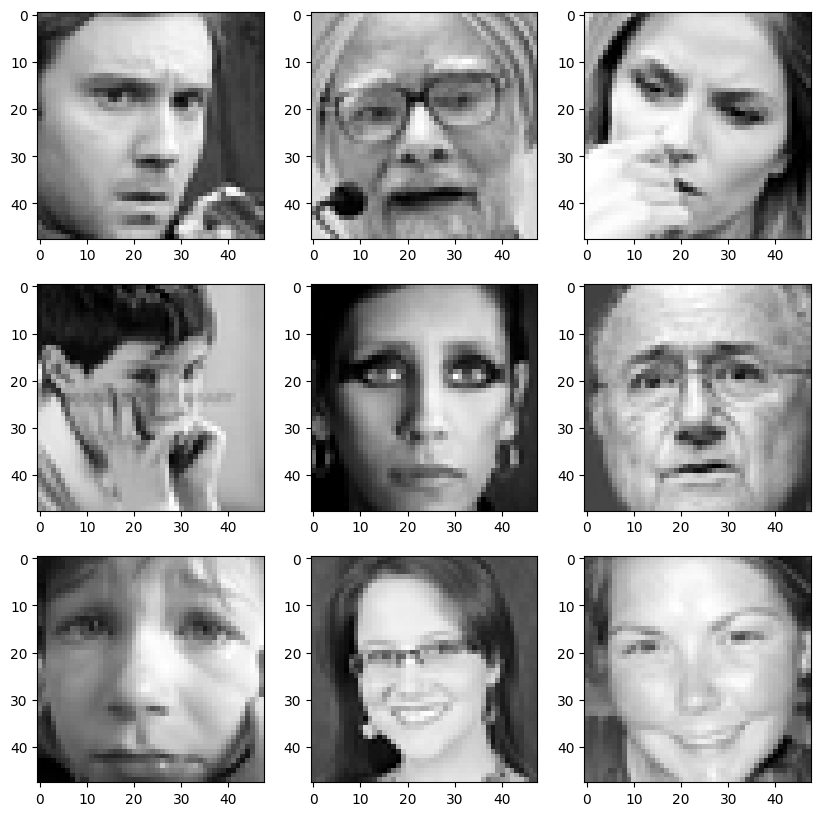

In [ ]:
data = pd.read_csv('/fer2013.csv')

print("Dataset Shape:", data.shape)
print("Emotion labels:", data['emotion'].unique())
print("Usage types:", data["Usage"].unique())

labels = data['emotion']
pixels = data['pixels']
images = np.zeros((pixels.shape[0], 48 * 48))

for ix in range(images.shape[0]):
    p = pixels[ix].split(' ')
    if len(p) < images.shape[1]:
        p.extend(['0'] * (images.shape[1] - len(p)))
    images[ix] = np.array(p, dtype='float32')

plt.figure(figsize=(10, 10))
for index, image in enumerate(images[:9]):
    plt.subplot(3, 3, index + 1)
    plt.imshow(image.reshape(48, 48), cmap='gray')
plt.show()



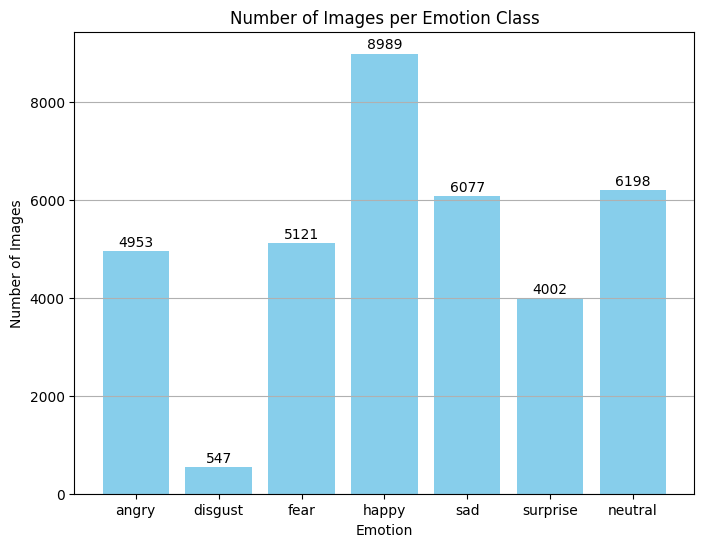

In [ ]:
class_counts = data['emotion'].value_counts().sort_index()

emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

plt.figure(figsize=(8, 6))
plt.bar(emotion_labels, class_counts, color='skyblue')
plt.title('Number of Images per Emotion Class')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.grid(axis='y')

for idx, value in enumerate(class_counts):
    plt.text(idx, value + 100, str(value), ha='center', fontsize=10)

plt.show()




In [ ]:

reshaped_images = images.reshape((-1, 48, 48, 1))


norm_images = reshaped_images / 255.0

new_labels = to_categorical(labels, num_classes=7)

print("Images shape:", norm_images.shape)
print("Labels shape:", new_labels.shape)


X_train, X_test, y_train, y_test = train_test_split(norm_images, new_labels, test_size=0.2, random_state=42)

print("Train images:", X_train.shape)
print("Test images:", X_test.shape)




Images shape: (35887, 48, 48, 1)
Labels shape: (35887, 7)
Train images: (28709, 48, 48, 1)
Test images: (7178, 48, 48, 1)


In [ ]:
# Build CNN model
model = Sequential()

model.add(Conv2D(64, (3,3), padding="same", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5,5), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation="softmax"))

opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

# Model summary
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-5, verbose=1)
checkpoint = ModelCheckpoint("Fer_Model_new.h5", monitor='val_loss', save_best_only=True, mode='min', verbose=1)

callbacks = [checkpoint, reduce_lr]

epochs = 25

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    callbacks=callbacks
)



Epoch 1/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2490 - loss: 1.9468
Epoch 1: val_loss improved from inf to 1.59234, saving model to Fer_Model_new.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.2490 - loss: 1.9466 - val_accuracy: 0.3817 - val_loss: 1.5923 - learning_rate: 5.0000e-04
Epoch 2/25
897/898 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4280 - loss: 1.4969
Epoch 2: val_loss improved from 1.59234 to 1.54574, saving model to Fer_Model_new.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.4281 - loss: 1.4968 - val_accuracy: 0.4313 - val_loss: 1.5457 - learning_rate: 5.0000e-04
Epoch 3/25
895/898 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4987 - loss: 1.3147
Epoch 3: val_loss improved from 1.54574 to 1.42675, saving model to Fer_Model_new.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.4987 - loss: 1.3146 - val_accuracy: 0.4847 - val_loss: 1.4267 - learning_rate: 5.0000e-04
Epoch 4/25
895/898 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5364 - loss: 1.2190
Epoch 4: val_loss improved from 1.42675 to 1.17625, saving model to Fer_Model_new.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.5365 - loss: 1.2190 - val_accuracy: 0.5468 - val_loss: 1.1762 - learning_rate: 5.0000e-04
Epoch 5/25
897/898 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5600 - loss: 1.1555
Epoch 5: val_loss did not improve from 1.17625
898/898 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.5600 - loss: 1.1555 - val_accuracy: 0.5085 - val_loss: 1.2598 - learning_rate: 5.0000e-04
Epoch 6/25
896/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5836 - loss: 1.0963
Epoch 6: val_loss did not improve from 1.17625

Epoch 6: ReduceLROnPlateau reducing learning rate to 5.0000002374872565e-05.
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.5836 - loss: 1.0963 - val_accuracy: 0.5336 - val_loss: 1.2285 - learning_rate: 5.0000e-04
Epoch 7/25
896/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6200 - loss: 1.0134
Epoch 7: val_loss improved from 1.17625 to 1.01708, saving model to Fer_Model_new.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.6201 - loss: 1.0133 - val_accuracy: 0.6222 - val_loss: 1.0171 - learning_rate: 5.0000e-05
Epoch 8/25
896/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6415 - loss: 0.9538
Epoch 8: val_loss did not improve from 1.01708
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.6415 - loss: 0.9538 - val_accuracy: 0.6206 - val_loss: 1.0204 - learning_rate: 5.0000e-05
Epoch 9/25
895/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6496 - loss: 0.9374
Epoch 9: val_loss improved from 1.01708 to 0.99794, saving model to Fer_Model_new.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.6496 - loss: 0.9374 - val_accuracy: 0.6261 - val_loss: 0.9979 - learning_rate: 5.0000e-05
Epoch 10/25
895/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6578 - loss: 0.9177
Epoch 10: val_loss did not improve from 0.99794
898/898 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.6578 - loss: 0.9177 - val_accuracy: 0.6265 - val_loss: 1.0005 - learning_rate: 5.0000e-05
Epoch 11/25
896/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6669 - loss: 0.8828
Epoch 11: val_loss did not improve from 0.99794

Epoch 11: ReduceLROnPlateau reducing learning rate to 1e-05.
898/898 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.6669 - loss: 0.8828 - val_accuracy: 0.6312 - val_loss: 0.9996 - learning_rate: 5.0000e-05
Epoch 12/25
895/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6754 - loss: 0.8745
Epoch 12: val_loss improved from 0.99794 to 0.99425, saving model to Fer_Model_new.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.6754 - loss: 0.8745 - val_accuracy: 0.6347 - val_loss: 0.9943 - learning_rate: 1.0000e-05
Epoch 13/25
895/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6784 - loss: 0.8682
Epoch 13: val_loss improved from 0.99425 to 0.99126, saving model to Fer_Model_new.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.6784 - loss: 0.8682 - val_accuracy: 0.6342 - val_loss: 0.9913 - learning_rate: 1.0000e-05
Epoch 14/25
896/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6778 - loss: 0.8640
Epoch 14: val_loss did not improve from 0.99126
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.6778 - loss: 0.8640 - val_accuracy: 0.6360 - val_loss: 0.9940 - learning_rate: 1.0000e-05
Epoch 15/25
895/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6797 - loss: 0.8526
Epoch 15: val_loss did not improve from 0.99126
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.6797 - loss: 0.8526 - val_accuracy: 0.6358 - val_loss: 0.9918 - learning_rate: 1.0000e-05
Epoch 16/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6781 - loss: 0.8537
Epoch 16: val_loss improved from 0.99126 to 0.98979, saving model to Fer_Model_new.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.6781 - loss: 0.8537 - val_accuracy: 0.6343 - val_loss: 0.9898 - learning_rate: 1.0000e-05
Epoch 17/25
895/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6815 - loss: 0.8495
Epoch 17: val_loss improved from 0.98979 to 0.98525, saving model to Fer_Model_new.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.6815 - loss: 0.8495 - val_accuracy: 0.6376 - val_loss: 0.9853 - learning_rate: 1.0000e-05
Epoch 18/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6812 - loss: 0.8539
Epoch 18: val_loss did not improve from 0.98525
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.6812 - loss: 0.8539 - val_accuracy: 0.6389 - val_loss: 0.9859 - learning_rate: 1.0000e-05
Epoch 19/25
895/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6890 - loss: 0.8377
Epoch 19: val_loss did not improve from 0.98525
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.6890 - loss: 0.8378 - val_accuracy: 0.6383 - val_loss: 0.9906 - learning_rate: 1.0000e-05
Epoch 20/25
895/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6885 - loss: 0.8331
Epoch 20: val_loss did not improve from 0.98525
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.6885 - loss: 0.8331 - val_accuracy: 0.6389 - val_loss: 0.9882 - learning_rate: 1.0000e-05
Epoc

In [ ]:
from tensorflow import keras
model = keras.models.load_model("Fer_Model_new.h5")

import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print("No face detected!")
        return None

    (x, y, w, h) = faces[0]
    face = gray[y:y+h, x:x+w]

    face_resized = cv2.resize(face, (48, 48))
    face_resized = face_resized / 255.0  # Normalize

    return face_resized.reshape((1, 48, 48, 1))

print(" Model loaded and preprocessing function ready!")


✅ Model loaded and preprocessing function ready!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Emotion: sad


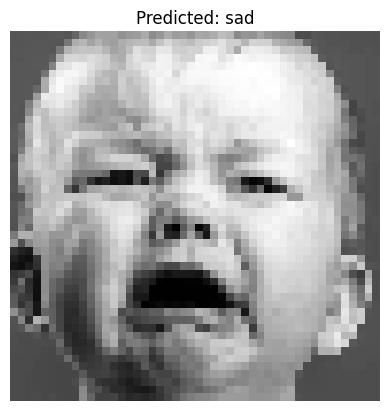

In [ ]:

image_path = "/sad.jpg"

preprocessed_image = preprocess_image(image_path)


if preprocessed_image is not None:

    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction, axis=-1)[0]


    emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

    print(f"Predicted Emotion: {emotions[predicted_class]}")


    plt.imshow(preprocessed_image.reshape(48, 48), cmap='gray')
    plt.title(f"Predicted: {emotions[predicted_class]}")
    plt.axis('off')
    plt.show()
else:
    print("⚠️ Face not detected in the image. Try another image!")


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📸 Take Photo';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    print(f'📷 Photo saved to {filename}')
    return filename



✅ Camera capture function ready!


<IPython.core.display.Javascript object>

📷 Photo saved to /sad.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Emotion from Camera: neutral
predicted_class :  6


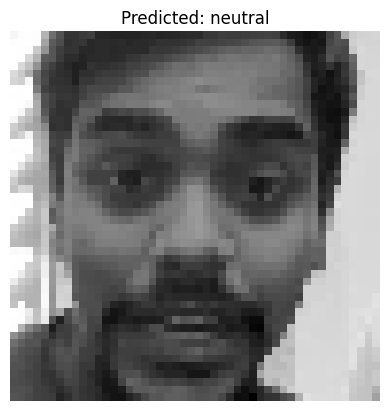

In [ ]:
captured_image_path = take_photo('/sad.jpg')

preprocessed_image = preprocess_image(captured_image_path)

if preprocessed_image is not None:
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction, axis=-1)[0]

    emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

    print(f"Predicted Emotion from Camera: {emotions[predicted_class]}")
    print("predicted_class : ",predicted_class)

    import matplotlib.pyplot as plt
    plt.imshow(preprocessed_image.reshape(48, 48), cmap='gray')
    plt.title(f"Predicted: {emotions[predicted_class]}")
    plt.axis('off')
    plt.show()
else:
    print("⚠️ No face detected in the captured image.")


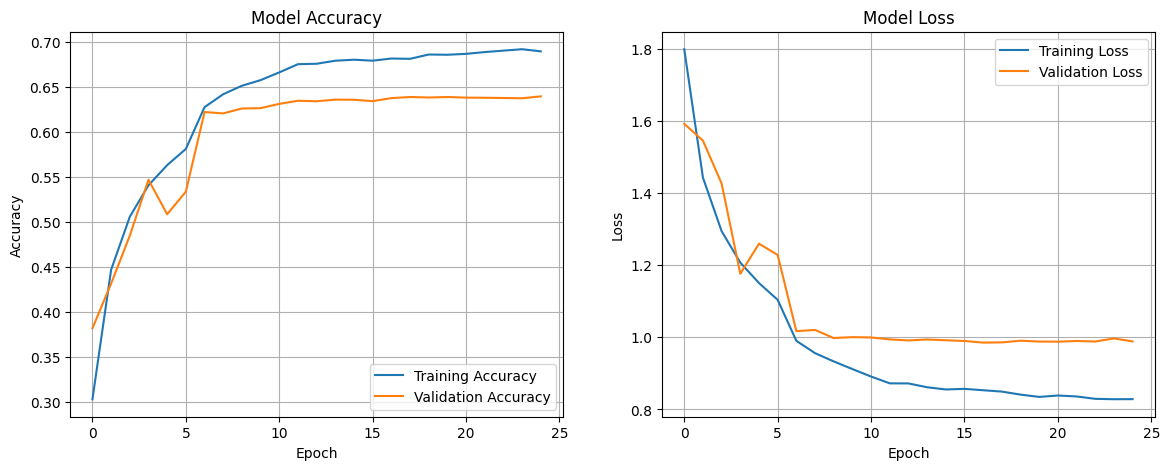

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()



225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Classification Report:

              precision    recall  f1-score   support

       angry       0.60      0.53      0.56       985
     disgust       0.68      0.55      0.61       102
        fear       0.53      0.37      0.44      1043
       happy       0.81      0.85      0.83      1765
         sad       0.48      0.57      0.52      1210
    surprise       0.75      0.78      0.76       795
     neutral       0.58      0.63      0.61      1278

    accuracy                           0.64      7178
   macro avg       0.63      0.61      0.62      7178
weighted avg       0.64      0.64      0.63      7178



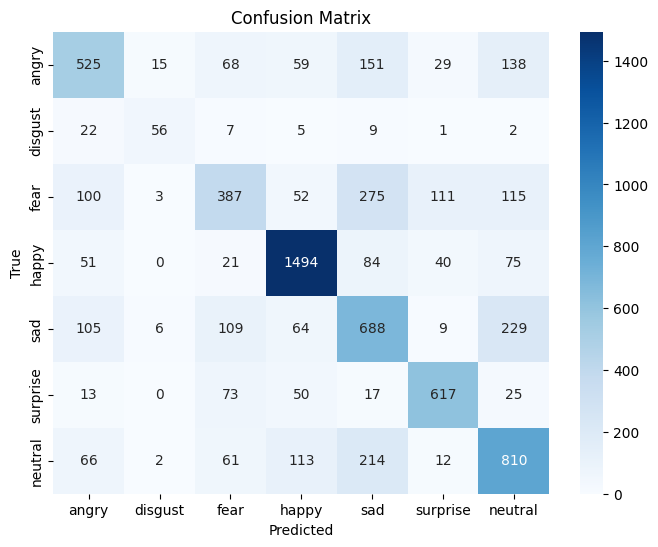

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')))

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'),
            yticklabels=('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

